# Lab Work 2

Hon Yao Zhi 22004845

# Wine Classification Using Neural Network

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fullwinequality.csv')
data.shape

(5320, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  is_red                5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


In [4]:
# Print out the value counts of each column and get some insights

for i in data.columns:
    print(f'Column name: [{i}]\n',data[i].value_counts(),'\n','---'*25,'\n')

Column name: [fixed acidity]
 6.80     279
6.60     269
6.40     246
6.90     225
7.00     223
        ... 
13.50      1
13.70      1
15.90      1
3.80       1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [volatile acidity]
 0.280    232
0.240    219
0.260    219
0.270    188
0.250    186
        ... 
1.240      1
0.090      1
0.905      1
0.865      1
0.825      1
Name: volatile acidity, Length: 187, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [citric acid]
 0.30    264
0.32    240
0.28    236
0.49    232
0.26    203
       ... 
0.75      1
0.80      1
0.99      1
0.91      1
0.86      1
Name: citric acid, Length: 89, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [residual sugar]
 2.00     200
1.60     200
1.40     194
1.80     193
1.20     172
        ... 
2

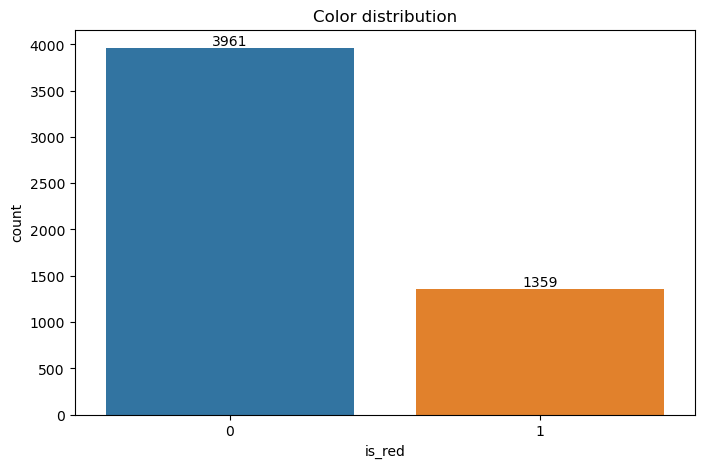

In [5]:
# Plotting wine color distritbution
figure = plt.figure(figsize = (8,5))
ax = sns.countplot(x = "is_red", data = data)
plt.title("Color distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

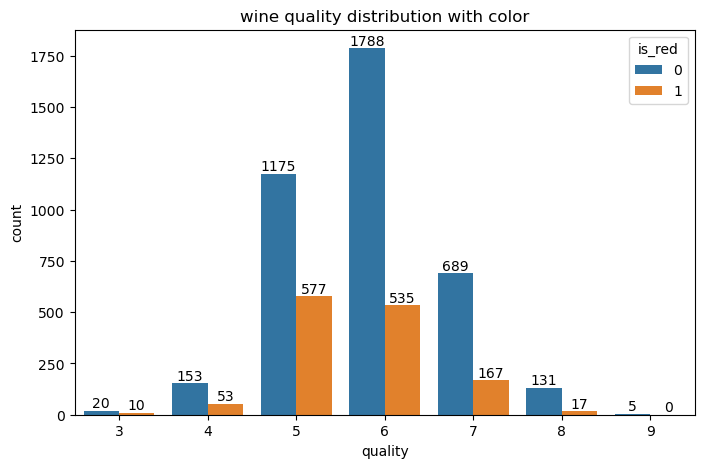

In [6]:
figure = plt.figure(figsize = (8,5))
ax = sns.countplot(x = "quality", hue = "is_red", data = data)
plt.title("wine quality distribution with color")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

In [7]:
#Mapping values of target variable quality to 'low', 'medium' and 'high' categories for classification
data['quality']=data['quality'].map({3:'low', 4:'low', 5:'medium', 6:'medium', 7:'medium', 8:'high', 9:'high'})
data['quality']=data['quality'].map({'low':0,'medium':1,'high':2})

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,5.3,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4,1,0
1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2,1,0
2,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,1,0
3,8.0,0.24,0.48,6.8,0.047,13.0,134.0,0.99616,3.23,0.70,10.0,1,0
4,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1


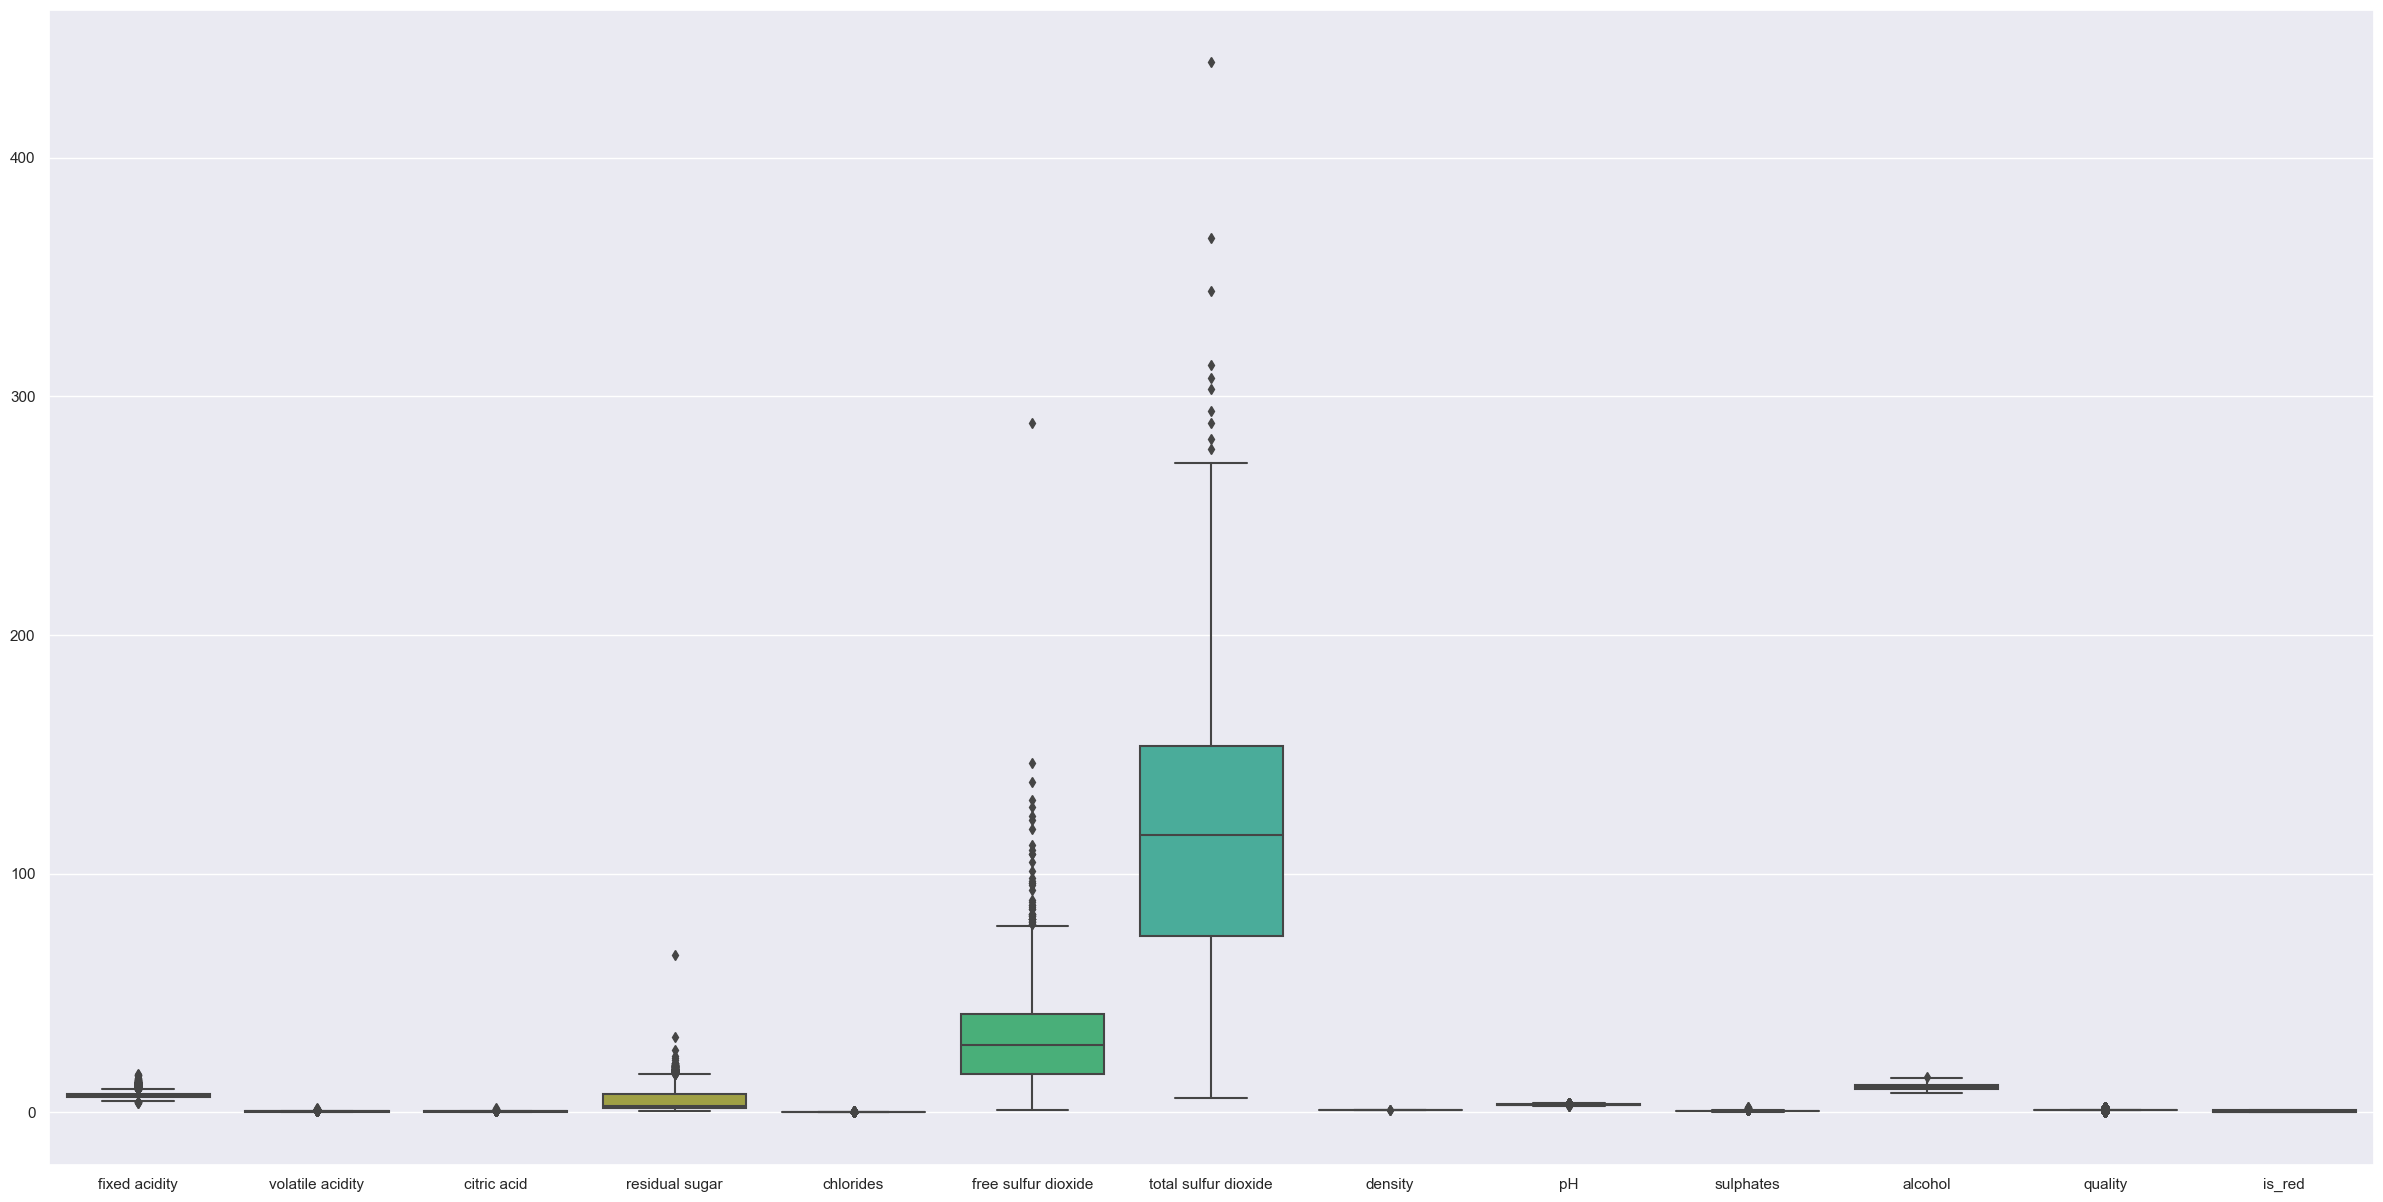

In [8]:
sns.set()
plt.figure(figsize=(30,15))
sns.boxplot(data=data)
plt.show()

'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide' contain significant outliers.

In [9]:
#Removing outliers in residual sugar
lower = data['residual sugar'].mean()-3*data['residual sugar'].std()
upper = data['residual sugar'].mean()+3*data['residual sugar'].std()
data = data[(data['residual sugar']>lower) & (data['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = data['free sulfur dioxide'].mean()-3*data['free sulfur dioxide'].std()
upper = data['free sulfur dioxide'].mean()+3*data['free sulfur dioxide'].std()
data = data[(data['free sulfur dioxide']>lower) & (data['free sulfur dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = data['total sulfur dioxide'].mean()-3*data['total sulfur dioxide'].std()
upper = data['total sulfur dioxide'].mean()+3*data['total sulfur dioxide'].std()
data = data[(data['total sulfur dioxide']>lower) & (data['total sulfur dioxide']<upper)]

data.shape

(5245, 13)

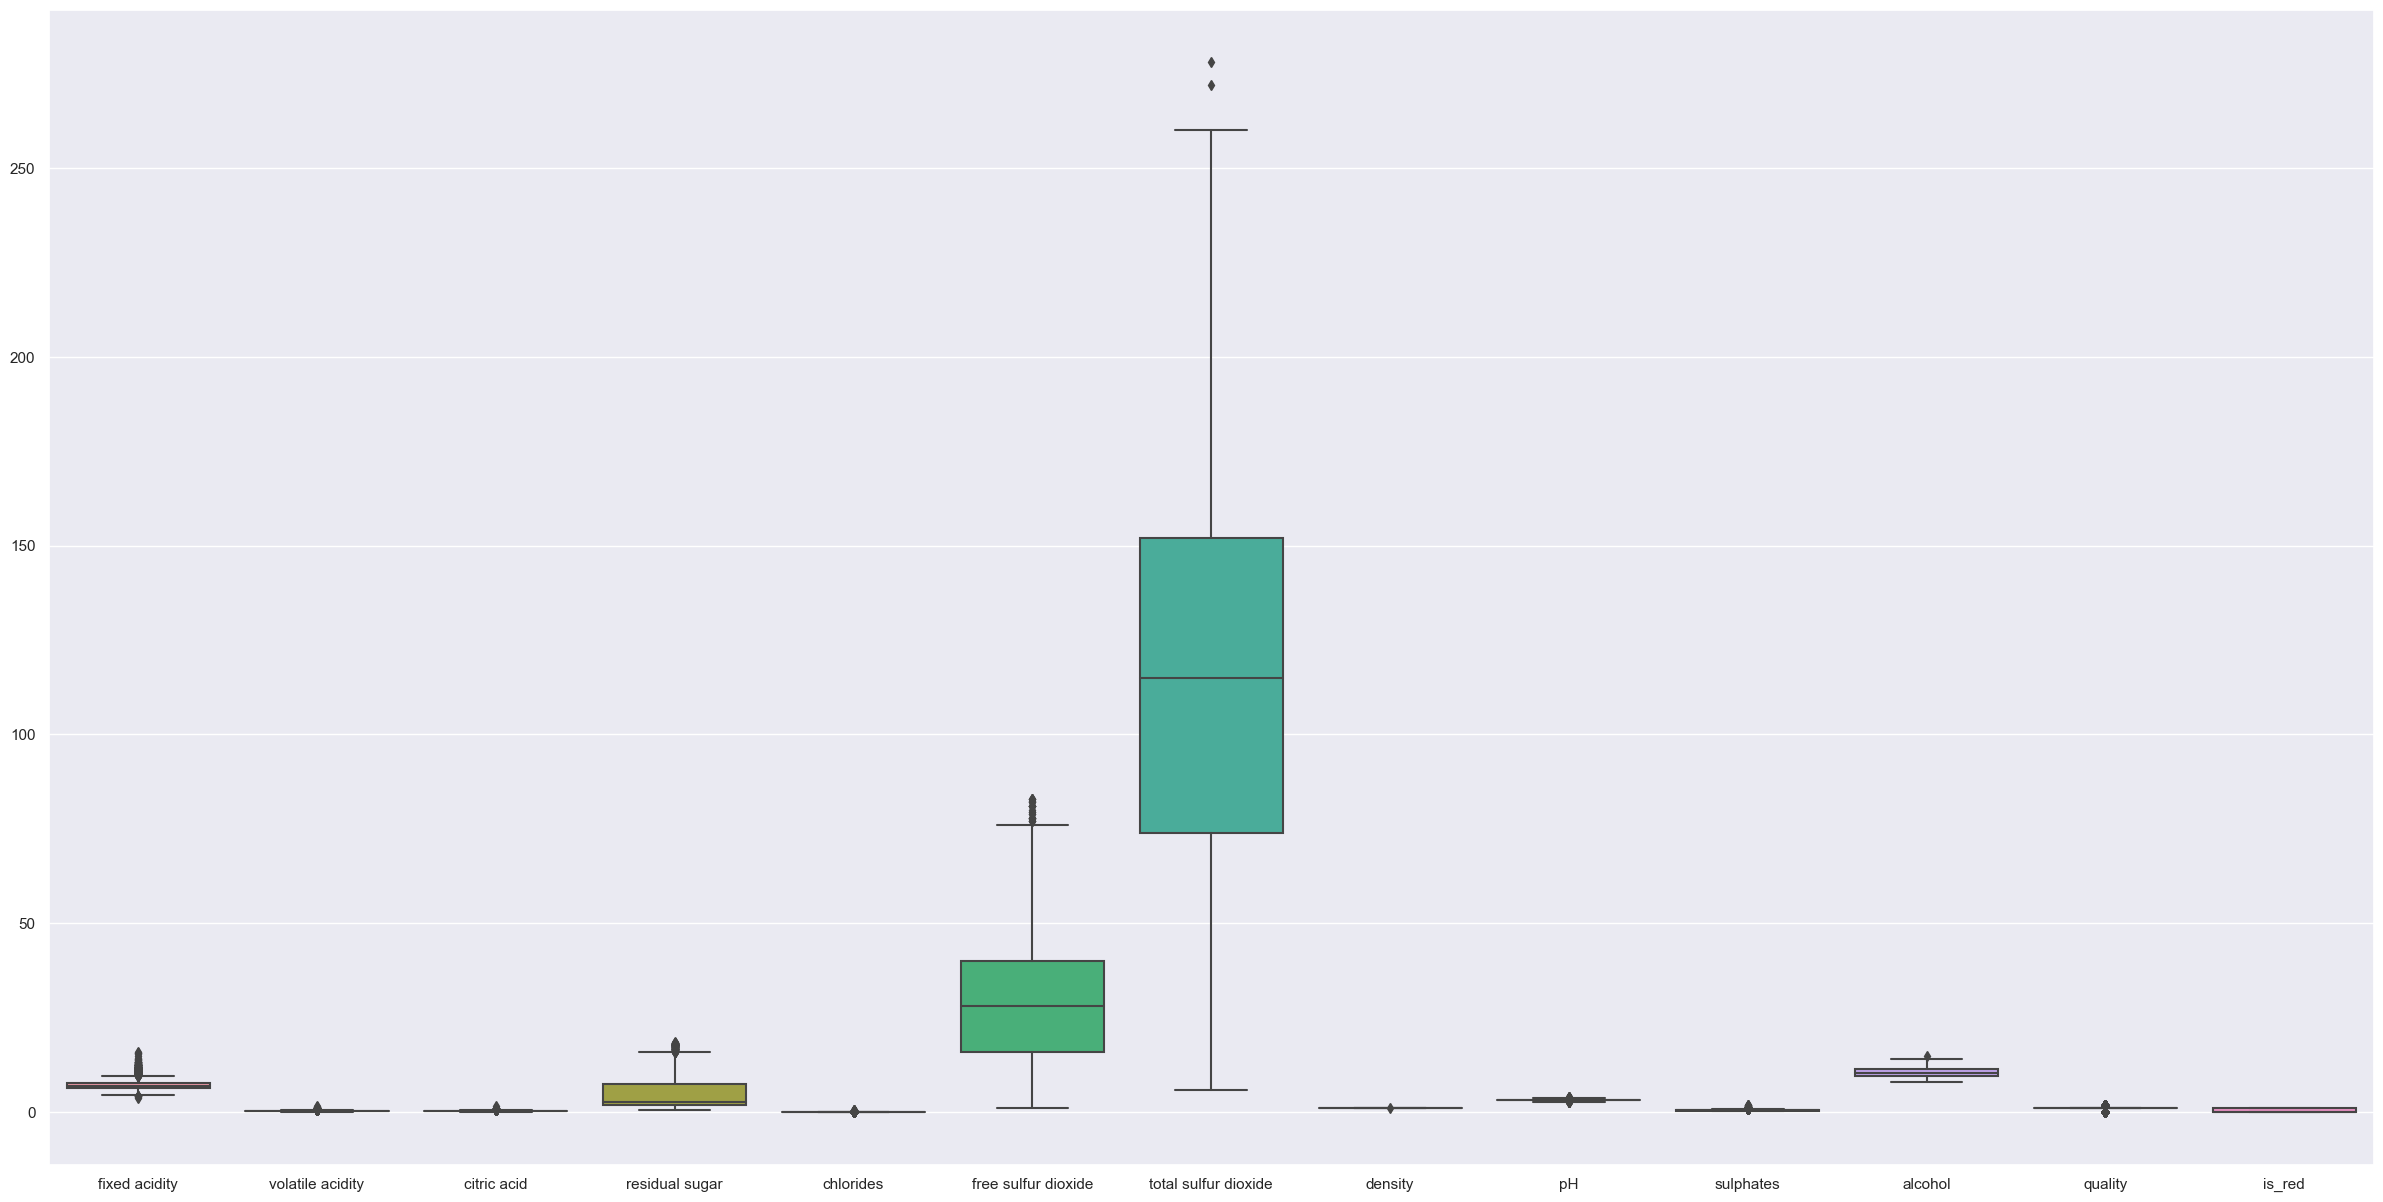

In [10]:
sns.set()
plt.figure(figsize=(30,15))
sns.boxplot(data=data)
plt.show()

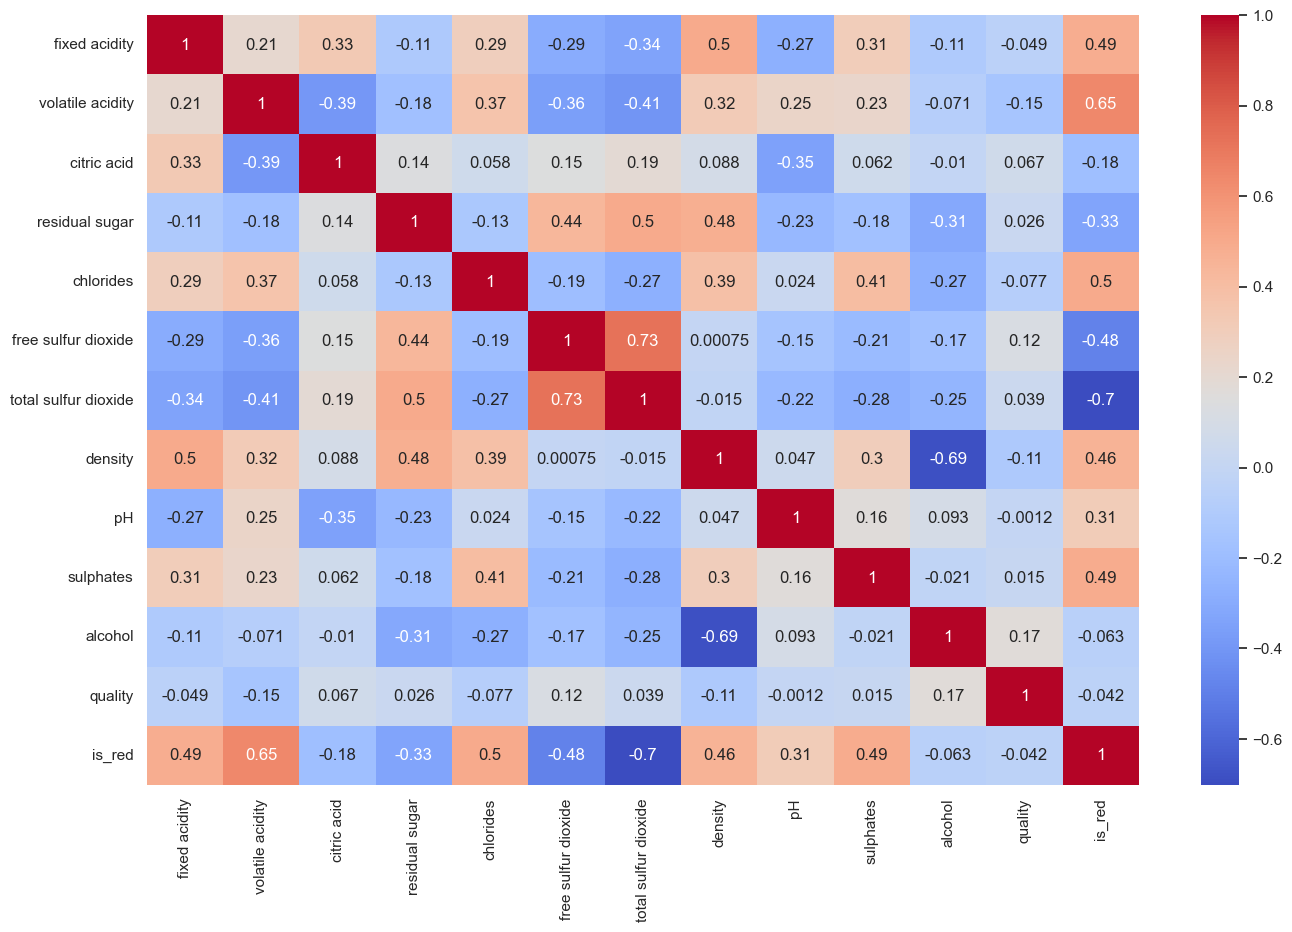

In [11]:
%matplotlib inline

# Sets the figure size of the heatmap to 16 by 10 inches.

plt.figure(figsize=(16,10))

# Creates the heatmap
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

plt.show()

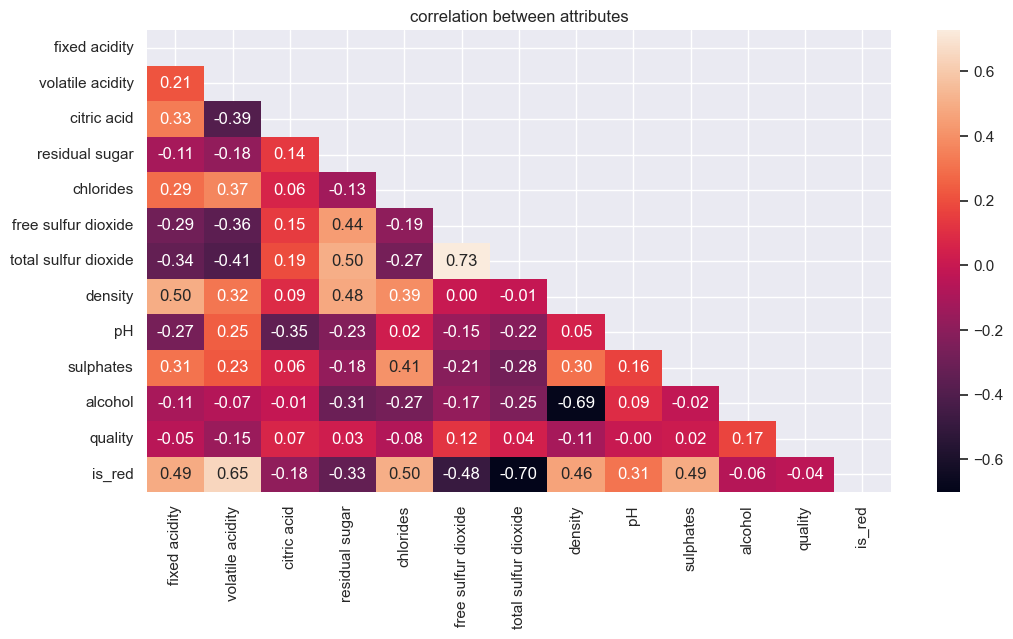

In [12]:
# plotting correlation heatmap
plt.figure(figsize=(12,6))
corr = data.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

Weak correlated attributes (Independent to each other): density and alcohol

# Feature Scaling

In [13]:
# All variables in X except "price"
X = data.drop('is_red',axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.3,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4,1
1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2,1
2,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,1
3,8.0,0.24,0.48,6.8,0.047,13.0,134.0,0.99616,3.23,0.70,10.0,1
4,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize all columns in the DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-1.449277,-0.147691,-1.354073,0.400462,-0.372511,-0.451482,0.503273,-0.273737,0.839157,0.441116,-0.132744,0.055334
1,-0.618314,-0.266210,-0.326529,-0.120750,-0.048758,-0.752719,0.395725,-0.692449,0.026171,-0.625330,1.387960,0.055334
2,-0.542772,-0.740287,0.015986,-0.641962,-0.777202,0.391981,-0.375036,-1.299582,0.276321,0.374464,1.134509,0.055334
3,0.590359,-0.621768,1.112033,0.447845,-0.264593,-0.993708,0.377801,0.584624,0.026171,1.107646,-0.470678,0.055334
4,1.270238,-0.325470,0.221495,-0.713036,0.274994,-0.270740,-1.002400,0.877723,-0.286515,5.506738,-0.217227,0.055334


In [15]:
# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# VIF scores function
def vif_scores(X):
    vif = pd.DataFrame()
    vif['cols'] = X.columns
    vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by='VIF', ascending=False)

# Calculate VIF scores
vif_scores(X)


,cols,VIF
7,density,16.131103
3,residual sugar,6.047950
0,fixed acidity,5.388695
10,alcohol,5.262928
6,total sulfur dioxide,2.958276
8,pH,2.603163
5,free sulfur dioxide,2.236556
1,volatile acidity,2.005973
2,citric acid,1.674152
4,chlorides,1.644315


# Split data into Training and Testing data

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-1.449277,-0.147691,-1.354073,0.400462,-0.372511,-0.451482,0.503273,-0.273737,0.839157,0.441116,-0.132744,0.055334
1,-0.618314,-0.266210,-0.326529,-0.120750,-0.048758,-0.752719,0.395725,-0.692449,0.026171,-0.625330,1.387960,0.055334
2,-0.542772,-0.740287,0.015986,-0.641962,-0.777202,0.391981,-0.375036,-1.299582,0.276321,0.374464,1.134509,0.055334
3,0.590359,-0.621768,1.112033,0.447845,-0.264593,-0.993708,0.377801,0.584624,0.026171,1.107646,-0.470678,0.055334
4,1.270238,-0.325470,0.221495,-0.713036,0.274994,-0.270740,-1.002400,0.877723,-0.286515,5.506738,-0.217227,0.055334


In [17]:
y = data['is_red']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: is_red, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Number of rows and column in all data

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((3356, 12), (840, 12), (1049, 12), (3356,), (840,), (1049,))

# Model Development

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential

# <div class="alert alert-info">Model 1</div>

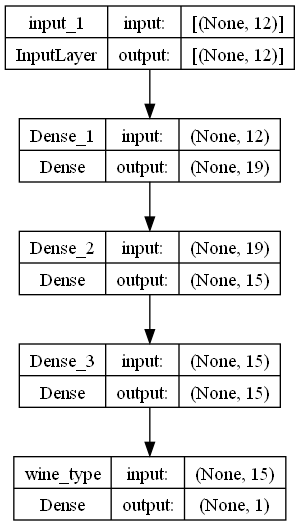

In [20]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from IPython.display import Image as DisplayImage, display

def base_model(inputs):
    x = Dense(units=19, activation='sigmoid', name='Dense_1')(inputs)
    x = Dense(units=15, activation='sigmoid', name='Dense_2')(x)
    x = Dense(units=15, activation='sigmoid', name='Dense_3')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_type])
    return model

inputs = Input(shape=(12,))
model = final_model(inputs)

# Visualization using Keras Model Plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the generated image
display(DisplayImage('model_architecture.png'))


In [21]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])

    train_loss_values = []  # List to collect training loss values
    val_loss_values = []  # List to collect validation loss values
    
    # input
    W1 = tf.Variable(tf.random_normal([12, 19], seed=0), name='weight1', use_resource=True)
    b1 = tf.Variable(tf.random_normal([19], seed=0), name='bias1', use_resource=True)
    layer1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([19, 15], seed=0), name='weight2', use_resource=True)
    b2 = tf.Variable(tf.random_normal([15], seed=0), name='bias2', use_resource=True)
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([15, 15], seed=0), name='weight3', use_resource=True)
    b3 = tf.Variable(tf.random_normal([15], seed=0), name='bias3', use_resource=True)
    layer3 = tf.nn.sigmoid(tf.matmul(layer2, W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([15, 1], seed=0), name='weight4', use_resource=True)
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4', use_resource=True)
    logits = tf.matmul(layer3, W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    
    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            
            # Collect training loss value
            loss_train = sess.run(cost, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            train_loss_values.append(loss_train)
        
            if step % 1000 == 0:
                loss_val, acc = sess.run([cost, accuracy], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss_val, acc))

            loss_val = sess.run(cost, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
            val_loss_values.append(loss_val)

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc, val_predict, val_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        
        return train_acc, val_acc, train_loss_values, val_loss_values

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_train_loss, ann_mlp_val_loss = ann_mlp()

Instructions for updating:
non-resource variables are not supported in the long term
===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)

============Processing============
Step:     0	Loss: 1.059	Acc: 26.43%
Step:  1000	Loss: 0.613	Acc: 72.98%
Step:  2000	Loss: 0.573	Acc: 73.69%
Step:  3000	Loss: 0.550	Acc: 73.69%
Step:  4000	Loss: 0.527	Acc: 73.69%
Step:  5000	Loss: 0.504	Acc: 73.69%
Step:  6000	Loss: 0.481	Acc: 73.69%
Step:  7000	Loss: 0.457	Acc: 74.40%
Step:  8000	Loss: 0.433	Acc: 79.29%
Step:  9000	Loss: 0.408	Acc: 83.69%
Step: 10000	Loss: 0.383	Acc: 85.71%

============Results============
Training Accuracy = 0.8644219
Validation Accuracy = 0.85714287


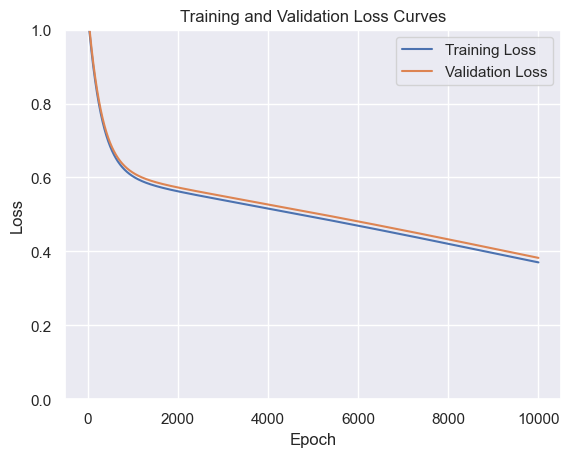

In [22]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

# <div class="alert alert-info">Model 2</div>

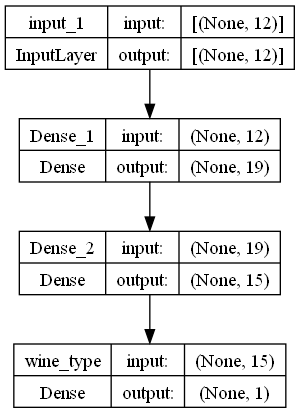

In [23]:
def base_model(inputs):
    x = Dense(units=19, activation='sigmoid', name='Dense_1')(inputs)
    x = Dense(units=15, activation='sigmoid', name='Dense_2')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_type])
    return model

inputs = Input(shape=(12,))
model = final_model(inputs)

# Visualization using Keras Model Plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the generated image
display(DisplayImage('model_architecture.png'))

In [24]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])

    train_loss_values = []  # List to collect training loss values
    val_loss_values = []  # List to collect validation loss values
    
    # input
    W1 = tf.Variable(tf.random_normal([12, 19], seed=0), name='weight1', use_resource=True)
    b1 = tf.Variable(tf.random_normal([19], seed=0), name='bias1', use_resource=True)
    layer1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([19, 15], seed=0), name='weight2', use_resource=True)
    b2 = tf.Variable(tf.random_normal([15], seed=0), name='bias2', use_resource=True)
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, W2) + b2)

    # output
    W3 = tf.Variable(tf.random_normal([15, 1], seed=0), name='weight3', use_resource=True)
    b3 = tf.Variable(tf.random_normal([1], seed=0), name='bias3', use_resource=True)
    logits = tf.matmul(layer2, W3) + b3
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    
    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            
            # Collect training loss value
            loss_train = sess.run(cost, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            train_loss_values.append(loss_train)
        
            if step % 1000 == 0:
                loss_val, acc = sess.run([cost, accuracy], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss_val, acc))

            loss_val = sess.run(cost, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
            val_loss_values.append(loss_val)

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc, val_predict, val_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        
        return train_acc, val_acc, train_loss_values, val_loss_values

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_train_loss, ann_mlp_val_loss = ann_mlp()

===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)

============Processing============
Step:     0	Loss: 0.824	Acc: 50.71%
Step:  1000	Loss: 0.451	Acc: 80.00%
Step:  2000	Loss: 0.384	Acc: 83.81%
Step:  3000	Loss: 0.352	Acc: 86.07%
Step:  4000	Loss: 0.328	Acc: 87.74%
Step:  5000	Loss: 0.308	Acc: 89.05%
Step:  6000	Loss: 0.289	Acc: 90.12%
Step:  7000	Loss: 0.273	Acc: 91.90%
Step:  8000	Loss: 0.258	Acc: 92.86%
Step:  9000	Loss: 0.244	Acc: 93.57%
Step: 10000	Loss: 0.232	Acc: 94.29%

============Results============
Training Accuracy = 0.93563765
Validation Accuracy = 0.94285715


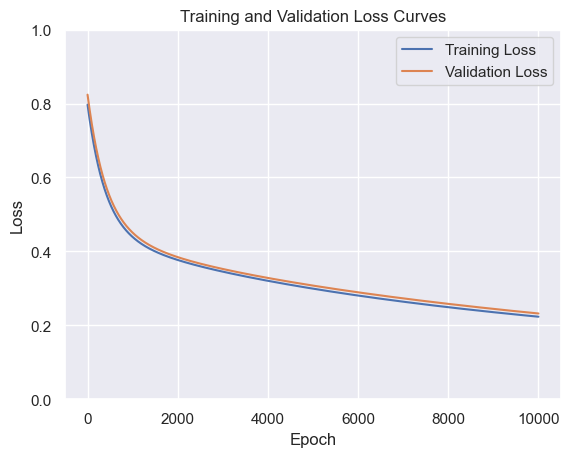

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

# <div class="alert alert-info">Model 3</div>

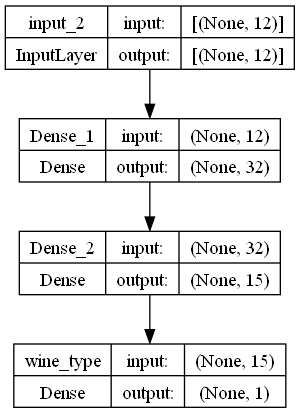

In [26]:
def base_model(inputs):
    x = Dense(units=32, activation='relu', name='Dense_1')(inputs)
    x = Dense(units=15, activation='relu', name='Dense_2')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_type])
    return model

inputs = Input(shape=(12,))
model = final_model(inputs)

# Visualization using Keras Model Plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the generated image
display(DisplayImage('model_architecture.png'))

In [27]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])
    
    train_loss_values = []  # List to collect training loss values
    val_loss_values = []  # List to collect validation loss values

    # input
    W1 = tf.Variable(tf.random_normal([12, 32], seed=0), name='weight1', use_resource=True)
    b1 = tf.Variable(tf.random_normal([32], seed=0), name='bias1', use_resource=True)
    layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([32, 15], seed=0), name='weight2', use_resource=True)
    b2 = tf.Variable(tf.random_normal([15], seed=0), name='bias2', use_resource=True)
    layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

    # output
    W3 = tf.Variable(tf.random_normal([15, 1], seed=0), name='weight3', use_resource=True)
    b3 = tf.Variable(tf.random_normal([1], seed=0), name='bias3', use_resource=True)
    logits = tf.matmul(layer2, W3) + b3
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    
    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            
            # Collect training loss value
            loss_train = sess.run(cost, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            train_loss_values.append(loss_train)
        
            if step % 1000 == 0:
                loss_val, acc = sess.run([cost, accuracy], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss_val, acc))

            loss_val = sess.run(cost, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
            val_loss_values.append(loss_val)

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc, val_predict, val_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        
        return train_acc, val_acc, train_loss_values, val_loss_values

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_train_loss, ann_mlp_val_loss = ann_mlp()

===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)

============Processing============
Step:     0	Loss: 17.045	Acc: 26.07%
Step:  1000	Loss: 0.343	Acc: 93.69%
Step:  2000	Loss: 0.220	Acc: 95.24%
Step:  3000	Loss: 0.169	Acc: 96.67%
Step:  4000	Loss: 0.139	Acc: 97.02%
Step:  5000	Loss: 0.120	Acc: 97.26%
Step:  6000	Loss: 0.107	Acc: 97.62%
Step:  7000	Loss: 0.097	Acc: 97.86%
Step:  8000	Loss: 0.089	Acc: 97.86%
Step:  9000	Loss: 0.082	Acc: 97.98%
Step: 10000	Loss: 0.076	Acc: 98.10%

============Results============
Training Accuracy = 0.9839094
Validation Accuracy = 0.9809524


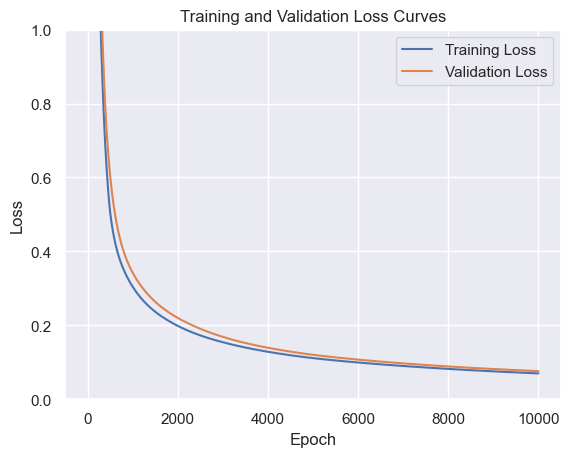

In [28]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

# <div class="alert alert-info">Model 4</div>

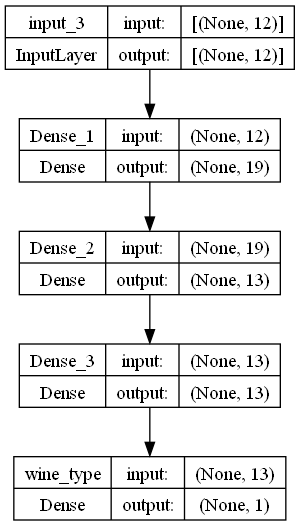

In [29]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from IPython.display import Image as DisplayImage, display

def base_model(inputs):
    x = Dense(units=19, activation='sigmoid', name='Dense_1')(inputs)
    x = Dense(units=13, activation='sigmoid', name='Dense_2')(x)
    x = Dense(units=13, activation='sigmoid', name='Dense_3')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_type])
    return model

inputs = Input(shape=(12,))
model = final_model(inputs)

# Visualization using Keras Model Plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the generated image
display(DisplayImage('model_architecture.png'))


In [30]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])

    train_loss_values = []  # List to collect training loss values
    val_loss_values = []  # List to collect validation loss values
    
    # input
    W1 = tf.Variable(tf.random_normal([12, 19], seed=0), name='weight1', use_resource=True)
    b1 = tf.Variable(tf.random_normal([19], seed=0), name='bias1', use_resource=True)
    layer1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([19, 13], seed=0), name='weight2', use_resource=True)
    b2 = tf.Variable(tf.random_normal([13], seed=0), name='bias2', use_resource=True)
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([13, 13], seed=0), name='weight3', use_resource=True)
    b3 = tf.Variable(tf.random_normal([13], seed=0), name='bias3', use_resource=True)
    layer3 = tf.nn.sigmoid(tf.matmul(layer2, W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([13, 1], seed=0), name='weight4', use_resource=True)
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4', use_resource=True)
    logits = tf.matmul(layer3, W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    
    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            
            # Collect training loss value
            loss_train = sess.run(cost, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            train_loss_values.append(loss_train)
        
            if step % 1000 == 0:
                loss_val, acc = sess.run([cost, accuracy], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss_val, acc))

            loss_val = sess.run(cost, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
            val_loss_values.append(loss_val)

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc, val_predict, val_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        
        return train_acc, val_acc, train_loss_values, val_loss_values

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_train_loss, ann_mlp_val_loss = ann_mlp()

===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)

============Processing============
Step:     0	Loss: 1.116	Acc: 26.31%
Step:  1000	Loss: 0.589	Acc: 66.79%
Step:  2000	Loss: 0.525	Acc: 73.57%
Step:  3000	Loss: 0.493	Acc: 73.69%
Step:  4000	Loss: 0.464	Acc: 73.69%
Step:  5000	Loss: 0.433	Acc: 73.69%
Step:  6000	Loss: 0.403	Acc: 73.69%
Step:  7000	Loss: 0.374	Acc: 74.88%
Step:  8000	Loss: 0.345	Acc: 81.67%
Step:  9000	Loss: 0.318	Acc: 88.21%
Step: 10000	Loss: 0.294	Acc: 92.02%

============Results============
Training Accuracy = 0.9195471
Validation Accuracy = 0.9202381


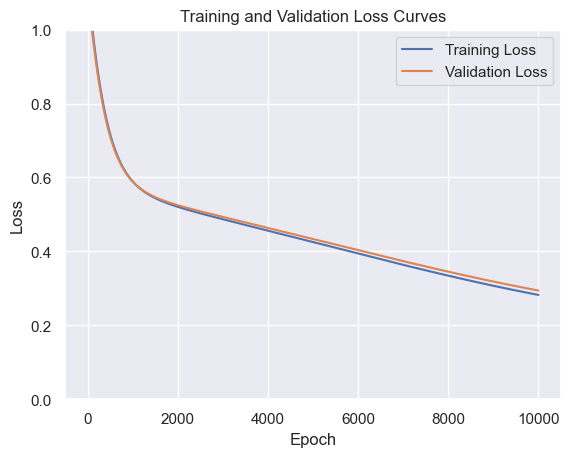

In [31]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

#  <div class="alert alert-info">Model 5</div>

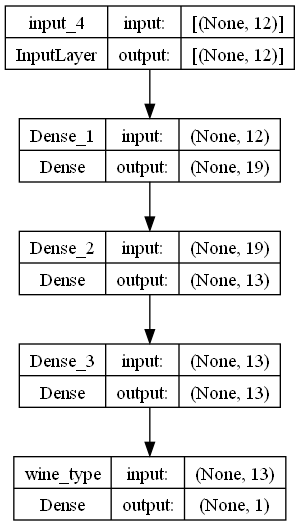

In [32]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from IPython.display import Image as DisplayImage, display

def base_model(inputs):
    x = Dense(units=19, activation='relu', name='Dense_1')(inputs)
    x = Dense(units=13, activation='relu', name='Dense_2')(x)
    x = Dense(units=13, activation='relu', name='Dense_3')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_type])
    return model

inputs = Input(shape=(12,))
model = final_model(inputs)

# Visualization using Keras Model Plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the generated image
display(DisplayImage('model_architecture.png'))


In [33]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])

    train_loss_values = []  # List to collect training loss values
    val_loss_values = []  # List to collect validation loss values
    
    # input
    W1 = tf.Variable(tf.random_normal([12, 19], seed=0), name='weight1', use_resource=True)
    b1 = tf.Variable(tf.random_normal([19], seed=0), name='bias1', use_resource=True)
    layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([19, 13], seed=0), name='weight2', use_resource=True)
    b2 = tf.Variable(tf.random_normal([13], seed=0), name='bias2', use_resource=True)
    layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([13, 13], seed=0), name='weight3', use_resource=True)
    b3 = tf.Variable(tf.random_normal([13], seed=0), name='bias3', use_resource=True)
    layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([13, 1], seed=0), name='weight4', use_resource=True)
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4', use_resource=True)
    logits = tf.matmul(layer3, W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    
    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for step in range(10001):
            sess.run(train, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            
            # Collect training loss value
            loss_train = sess.run(cost, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            train_loss_values.append(loss_train)
        
            if step % 1000 == 0:
                loss_val, acc = sess.run([cost, accuracy], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss_val, acc))

            loss_val = sess.run(cost, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
            val_loss_values.append(loss_val)

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc, val_predict, val_correct = sess.run([accuracy, prediction, correct_prediction], feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        
        return train_acc, val_acc, train_loss_values, val_loss_values

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_train_loss, ann_mlp_val_loss = ann_mlp()

===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)

============Processing============
Step:     0	Loss: 38.279	Acc: 35.71%
Step:  1000	Loss: 0.386	Acc: 95.36%
Step:  2000	Loss: 0.274	Acc: 96.31%
Step:  3000	Loss: 0.222	Acc: 96.90%
Step:  4000	Loss: 0.188	Acc: 96.90%
Step:  5000	Loss: 0.162	Acc: 97.14%
Step:  6000	Loss: 0.143	Acc: 97.26%
Step:  7000	Loss: 0.128	Acc: 97.26%
Step:  8000	Loss: 0.117	Acc: 97.26%
Step:  9000	Loss: 0.107	Acc: 97.50%
Step: 10000	Loss: 0.101	Acc: 97.50%

============Results============
Training Accuracy = 0.98659116
Validation Accuracy = 0.975


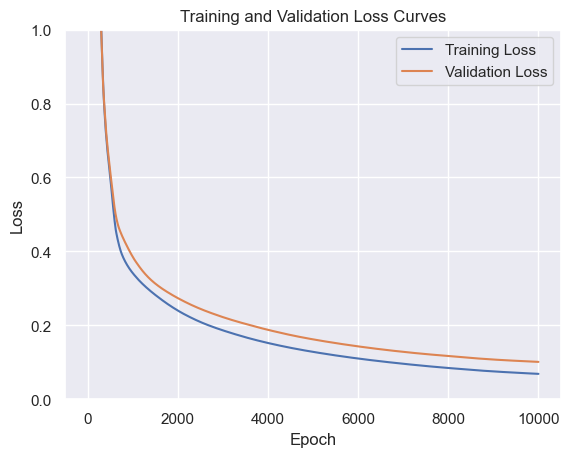

In [34]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

# Model Evaluation

Training Accuracy = 0.9839094
Validation Accuracy = 0.9809524

Model 3 gets highest accuracy in both training and validation, having the lowest loss.

Model 3 also has closer training loss and validation loss curve.
Model 3 is choosen.

## Hyperparameters tuning

The hyperparameter tuning used is focused on the regularization strength (regularization_strength) and learning rate (learning_rate) for the Adam optimizer. 


- Regularization Strength: 

    - control the amount of regularization in training
    - help prevent overfitting by adding a penalty term to the loss function based on the weights of the model
    - higher regularization strength value will increase the penalty, leading to more regularization
    
    
 - Learning Rate:
 
     - determine the step size taken during each update of the model's parameters. 
     - control the speed at which the model learns from the training data
     - higher learning rate can lead to faster convergence but may risk overshooting the optimal solution, while a lower learning rate may result in slower convergence

In [35]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def ann_mlp(regularization_strength=0.0015):
    print("===========Data Summary===========")
    print("Training Data:", X_train.shape)
    print("Cross Validation Data:", X_val.shape)
    print("Testing Data:", X_test.shape)

    X = tf.placeholder(tf.float32, [None, 12])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([12, 32], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([32], seed=0), name='bias1')
    layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([32, 15], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([15], seed=0), name='bias2')
    layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

    # output
    W3 = tf.Variable(tf.random_normal([15, 1], seed=0), name='weight4')
    b3 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer2, W3) + b3
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
    cost = tf.reduce_mean(cost_i)

    # Adam optimizer
    train = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    # Regularization
    reg_term = regularization_strength * (tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)) + tf.reduce_sum(tf.square(W3)))
    cost = cost + reg_term

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(12001):
            _, c = sess.run([train, cost], feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
            if (step) % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: np.array(y_train.values).reshape(-1, 1)})
        val_acc = sess.run(accuracy, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
        test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: np.array(y_test.values).reshape(-1, 1)})

        val_predict = sess.run(prediction, feed_dict={X: X_val, Y: np.array(y_val.values).reshape(-1, 1)})
        test_predict = sess.run(prediction, feed_dict={X: X_test, Y: np.array(y_test.values).reshape(-1, 1)})

        print("\n============Results============")
        print("Training Accuracy =", train_acc)
        print("Validation Accuracy =", val_acc)
        print("Test Accuracy =", test_acc)

    return train_acc, val_acc, test_acc, val_predict, test_predict

ann_mlp_train_acc, ann_mlp_val_acc, ann_mlp_test_acc, ann_mlp_val_predict, ann_mlp_test_predict = ann_mlp(regularization_strength=0.0015)


===========Data Summary===========
Training Data: (3356, 12)
Cross Validation Data: (840, 12)
Testing Data: (1049, 12)

============Processing============
Step:     0	Loss: 17.582	Acc: 28.19%
Step:  1000	Loss: 3.751	Acc: 75.86%
Step:  2000	Loss: 1.907	Acc: 92.40%
Step:  3000	Loss: 1.623	Acc: 96.42%
Step:  4000	Loss: 1.516	Acc: 98.09%
Step:  5000	Loss: 1.466	Acc: 98.90%
Step:  6000	Loss: 1.442	Acc: 99.31%
Step:  7000	Loss: 1.428	Acc: 99.52%
Step:  8000	Loss: 1.416	Acc: 99.76%
Step:  9000	Loss: 1.412	Acc: 99.79%
Step: 10000	Loss: 1.413	Acc: 99.85%
Step: 11000	Loss: 1.416	Acc: 99.91%
Step: 12000	Loss: 1.421	Acc: 99.97%

============Results============
Training Accuracy = 0.99970204
Validation Accuracy = 0.9892857
Test Accuracy = 0.9914204


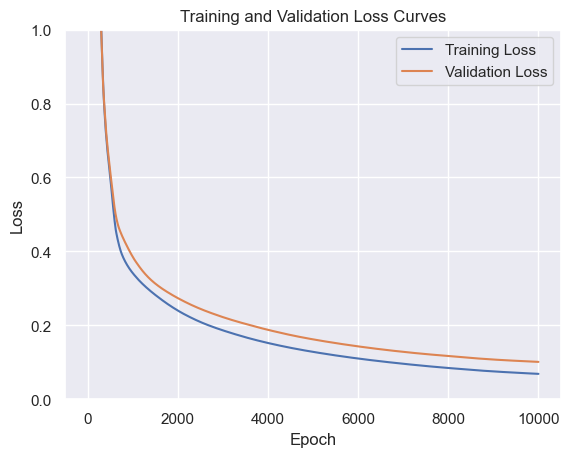

In [36]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
epochs = 10001  # Update with the correct number of epochs
plt.plot(range(1, epochs + 1), ann_mlp_train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), ann_mlp_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

In [37]:
ann_mlp_test_predict

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [38]:
import pandas as pd

# Assuming ann_mlp_test_predict is a numpy array and y_test is a pandas Series
table_data = pd.DataFrame({'Predicted Output': ann_mlp_test_predict.flatten(), 'Actual Output': y_test.values})
print(table_data)

      Predicted Output  Actual Output
0                  1.0              1
1                  0.0              0
2                  0.0              0
3                  1.0              1
4                  0.0              0
...                ...            ...
1044               0.0              0
1045               0.0              0
1046               0.0              0
1047               1.0              1
1048               0.0              0

[1049 rows x 2 columns]


In [39]:
ann_mlp_test_predict.shape, ann_mlp_val_predict.shape, y_test.shape, y_val.shape

((1049, 1), (840, 1), (1049,), (840,))

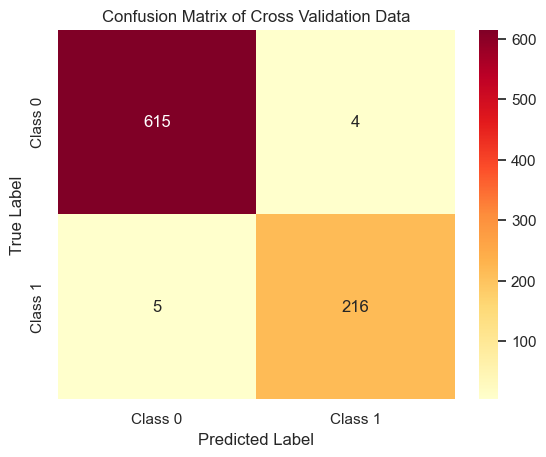

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

val_preds = np.round(ann_mlp_val_predict.flatten())
conf_matrix = confusion_matrix(y_val, val_preds)

labels = ['Class 0', 'Class 1']  # Replace with your class labels if necessary

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix of Cross Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

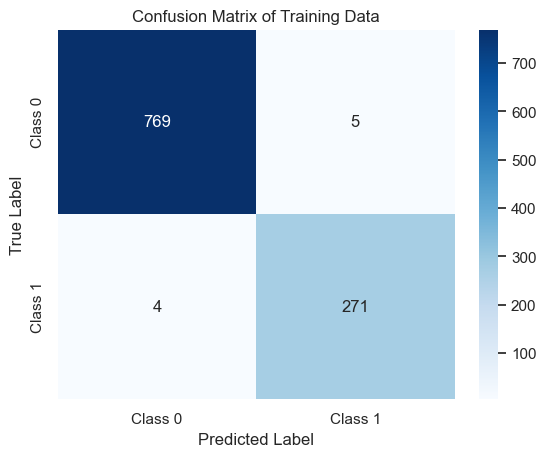

In [42]:
test_preds = np.round(ann_mlp_test_predict.flatten())
conf_matrix = confusion_matrix(y_test, test_preds)

labels = ['Class 0', 'Class 1']  # Replace with your class labels if necessary

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix of Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, test_preds)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print("\n============Testing Results============")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)



============Testing Results============
Accuracy: 0.9914204003813155
Precision: 0.9818840579710145
Recall: 0.9854545454545455
Specificity: 0.9935400516795866
F1 Score: 0.9836660617059891


The model seems to have performed very well.
It has achieved high accuracy, precision, recall, specificity, and F1 score.
These values indicate that the model has made accurate predictions with a high level of performance.

In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Compute and print the performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))
print("\n")
print("Classification Report:")
print(classification_report(y_test, test_preds))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, test_preds))

Confusion Matrix:
[[769   5]
 [  4 271]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       774
           1       0.98      0.99      0.98       275

    accuracy                           0.99      1049
   macro avg       0.99      0.99      0.99      1049
weighted avg       0.99      0.99      0.99      1049



Accuracy Score:
0.9914204003813155
